In [1]:
#matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as stats

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

5000
5000
5000
5000
5000
5000
5000
5000
5000


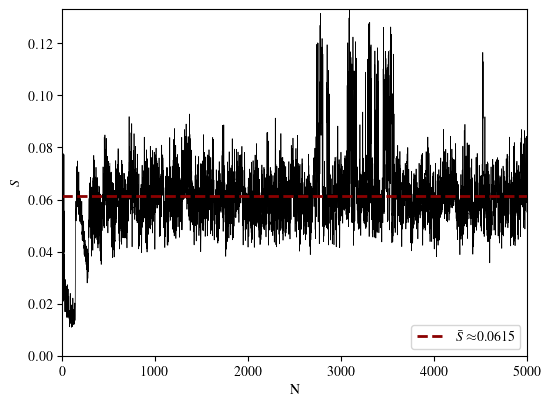

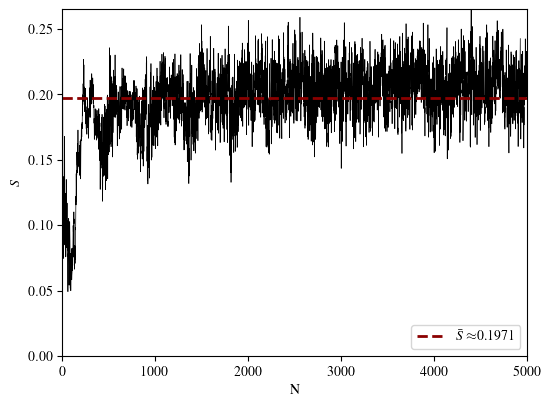

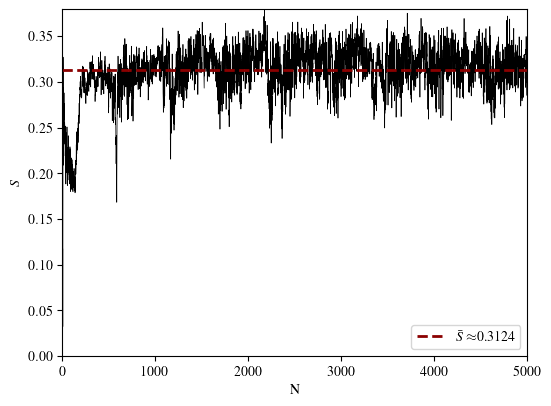

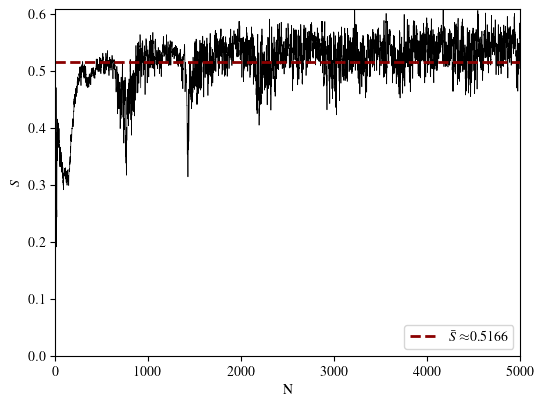

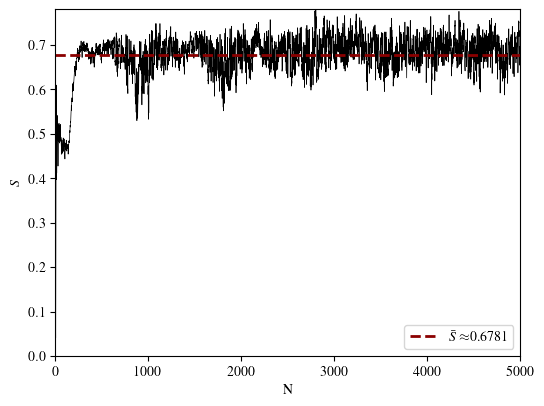

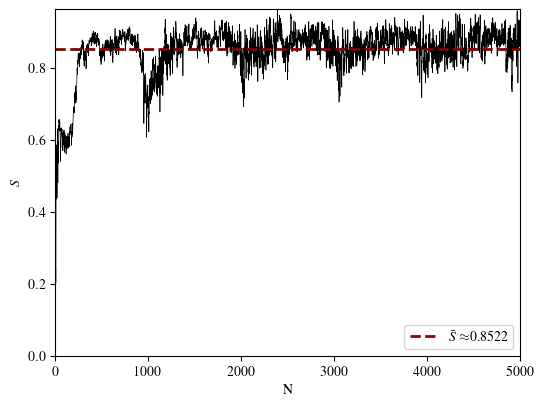

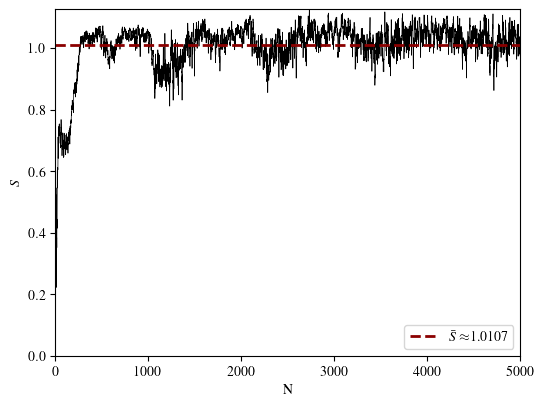

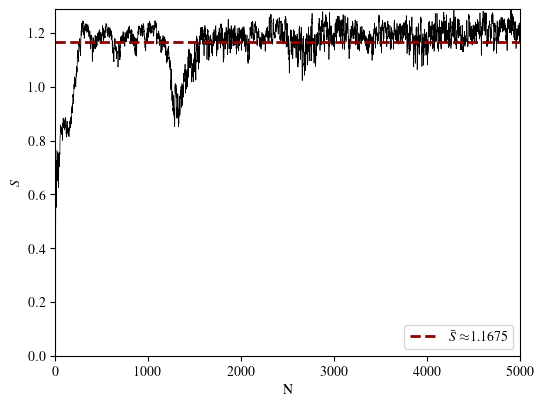

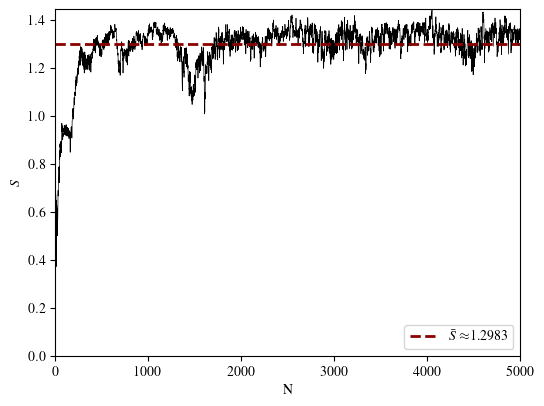

In [3]:
D = 101
interaction_pattern = "r"
averages = []
variances = []
qubit_nums = np.arange(2,11)
for n_qubits in qubit_nums:
    # n_qubits = 3
    # savefilepath = "C:/dev/Multicqw/biased_plots/"
    filename = "qsums_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
    Qsums = np.genfromtxt("C:/dev/Multicqw/data/sums/"+interaction_pattern+filename, usecols = 0, delimiter=",", dtype = float)
    T = Qsums.size
    print(T)
    k = -np.log(((3/4)**n_qubits) * Qsums)
    # k *= 1.0/np.log(8.0/9)
    t = np.arange(0,T)

    avg = np.average(k[50:])
    averages.append(avg)
    variance = np.var(k[50:])
    variances.append(variance)

    fig = plt.figure(figsize=(6,4.5))
    fig.clear()
    ax = fig.subplots()
    # plt.title(str(n_qubits))
    # ax.set_title(r'$k = \log_{8/9} \left[ \left( \frac{3}{4} \right)^{n_q} \cdot \sum Q^2 \right]$')
    ax.plot(t,k,'k-', lw=0.5)
    ax.set_xlim(0,T)
    ax.set_xlabel("N")
    ax.set_ylim(0,max(k))
    # ax.set_ylim(0,7)
    ax.set_ylabel(r'$S$')
    ax.plot((0,T),(avg,avg),'--', label = r'$\bar{S} \approx $' + str(avg)[:6],lw=2,color="darkred")
    ax.legend(loc='lower right')
    # fig.savefig(savefilepath + "dim" + str(D) + "/" + str(n_qubits)+"q.png")
    # ax.spines[['right','top']].set_visible(False)

In [4]:
res = stats.linregress(qubit_nums,averages)

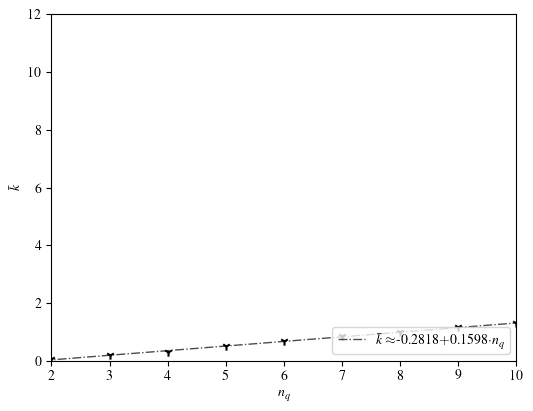

In [5]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.set_xlim(2,10)
ax.set_xlabel(r'$n_q$')
# ax.set_ylim(0,max(averages))
ax.set_ylim(0,12)
ax.plot([0,max(qubit_nums)],[res.intercept,res.intercept+max(qubit_nums)*res.slope],'-.k',linewidth=1,alpha=0.7,label=r'$\bar{k} \approx $' + str(res.intercept)[:7] + r'$+$' + str(res.slope)[:6] + r'$\cdot n_q$')
ax.scatter(qubit_nums,averages,marker='1',c='k')
ax.set_ylabel(r'$\bar{k}$')
ax.legend(loc='lower right')
# ax.spines[['right', 'top']].set_visible(False)
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

Text(0, 0.5, '$\\sigma(k)/\\bar{k}$')

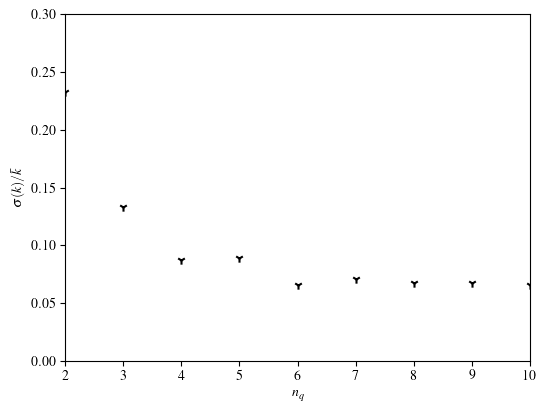

In [6]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.scatter(qubit_nums,np.sqrt(variances)/averages,marker='1',c='k')
ax.set_xlim(2,max(qubit_nums))
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,0.3)
ax.set_ylabel(r'$\sigma(k)/\bar{k}$')
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

In [7]:
print(np.sqrt(variances[8])/averages[8])

0.0659617815391237


In [8]:
print(res)

LinregressResult(slope=0.15983945479123363, intercept=-0.2818335837779308, rvalue=0.9988720061559749, pvalue=1.5853831182825648e-10, stderr=0.00287191105357286, intercept_stderr=0.01875924444776627)
